# Bondi's Radiating Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

The following metric is taken from the paper: "Gravitational Waves in General Relativity I : Cylindrical Waves" by L. Marder

https://www.jstor.org/stable/pdf/100266.pdf?casa_token=\
TrNPGDbJWhEAAAAA:nHeMW7zJ_ 0_ \
07X0h11FLWJGitgk21sXIJ0ms5rt9T6I7YP04Hxm5K6_DGydbW-\
uCDzXCIbV6iqe69QkuDgDCxonOf4hKoSU1TBMr0-OOnLLqt1CVyLmw

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz,alpha,beta = symbols( 't r phi z dt dr dphi dz alpha beta' ) 

In [5]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [6]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [7]:
alpha = Function('alpha')(r)
alpha

In [8]:
beta = Function('beta')(r)
beta

In [10]:
lineElement = expand(exp(2*alpha)*dt**2 - r**2 * exp(-2*alpha) * dphi**2 - exp(2*beta-2*alpha)*(dr**2 + dz**2))
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅α(r)                                                    ⎤
⎢ℯ                0               0                0        ⎥
⎢                                                           ⎥
⎢           -2⋅α(r)  2⋅β(r)                                 ⎥
⎢   0     -ℯ       ⋅ℯ             0                0        ⎥
⎢                                                           ⎥
⎢                              2  -2⋅α(r)                   ⎥
⎢   0             0          -r ⋅ℯ                 0        ⎥
⎢                                                           ⎥
⎢                                            -2⋅α(r)  2⋅β(r)⎥
⎣   0             0               0        -ℯ       ⋅ℯ      ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡ 2⋅α(r)                                                    ⎤
⎢ℯ                0               0                0        ⎥
⎢                                                           ⎥
⎢           -2⋅α(r)  2⋅β(r)                                 ⎥
⎢   0     -ℯ       ⋅ℯ             0                0        ⎥
⎢                                                           ⎥
⎢                              2  -2⋅α(r)                   ⎥
⎢   0             0          -r ⋅ℯ                 0        ⎥
⎢                                                           ⎥
⎢                                            -2⋅α(r)  2⋅β(r)⎥
⎣   0             0               0        -ℯ       ⋅ℯ      ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                            ⎡ 4⋅α(r)  -2⋅β(r) d                                            
⎢                            ⎢ℯ      ⋅ℯ       ⋅──(α(r))                                     
⎢                            ⎢                 dr                                           
⎢                            ⎢                                                              
⎢                            ⎢                            ⎛   -2⋅α(r)  2⋅β(r) d             
⎢⎡          d             ⎤  ⎢                           -⎜2⋅ℯ       ⋅ℯ      ⋅──(α(r)) - 2⋅ℯ
⎢⎢   0      ──(α(r))  0  0⎥  ⎢                            ⎝                   dr            
⎢⎢          dr            ⎥  ⎢            0              ───────────────────────────────────
⎢⎢                        ⎥  ⎢                                                              
⎢⎢d                       ⎥  ⎢                                                              
⎢⎢──(α(r))     0      0  0⎥  ⎢                                        

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                 ⎞                                                                   
⎢⎜   d          d       ⎟  4⋅α(r) - 2⋅β(r)                                                  
⎢⎜r⋅───(α(r)) + ──(α(r))⎟⋅ℯ                                                                 
⎢⎜    2         dr      ⎟                                                                   
⎢⎝  dr                  ⎠                                                                   
⎢─────────────────────────────────────────                                  0               
⎢                    r                                                                      
⎢                                                                                           
⎢                                             ⎛              2     2           2      ⎞     
⎢                                             ⎜    ⎛d       ⎞     d           d       ⎟   d 
⎢                                           r⋅⎜- 2⋅⎜──(α(r))⎟  + ───(α

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                 ⎞                    ⎛            2       2             2           
⎢⎜   d          d       ⎟  4⋅α(r) - 2⋅β(r)   ⎜  ⎛d       ⎞       d             d          d 
⎢⎜r⋅───(α(r)) + ──(α(r))⎟⋅ℯ                  ⎜r⋅⎜──(α(r))⎟  - r⋅───(α(r)) + r⋅───(β(r)) - ──
⎢⎜    2         dr      ⎟                    ⎜  ⎝dr      ⎠        2             2         dr
⎢⎝  dr                  ⎠                    ⎝                  dr            dr            
⎢───────────────────────────────────────── - ───────────────────────────────────────────────
⎢                    r                                                              r       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

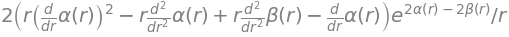

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                ⎡0  0  0  0⎤               
⎢                                                                ⎢          ⎥               
⎢                                                                ⎢0  0  0  0⎥               
⎢                                                                ⎢          ⎥               
⎢                                                                ⎢0  0  0  0⎥               
⎢                                                                ⎢          ⎥               
⎢                                                                ⎣0  0

In [22]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     